# <center>Livrable Projet DATA SCIENCE</center>

## Livrable 1 - Prétraitement (denoising/sharpening…)

Le but est de traiter un ensemble de photographies afin de les rendre mieux traitables par les algorithmes de Machine Learning. Il y a deux traitements à réaliser : le débruitage, et l’affutage. Vous devrez produire un notebook Jupyter explicitant ces étapes de prétraitement, et leurs performances. Ces algorithmes s’appuieront sur des notions assez simples autour des filtres de convolution, et les appliqueront pour améliorer la qualité de l’image. Il faudra notamment décider d’un compromis entre dé-bruitage et affutage.

Le notebook devra intégrer :
<ul>
    <li>Le code de chargement du fichier.</li>
    <li>Le code du débruitage sur un sous-ensemble d’images bruitées. Le code doit être accompagné d’explications.</li>
    <li>Le code de l’affutage sur un sous-ensembles d’images floutées. Le code doit être accompagné d’explications.</li>
    <li>
        Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.
    </li>
</ul>

<b>Ce livrable est à fournir pour le 18/12/2020</b>

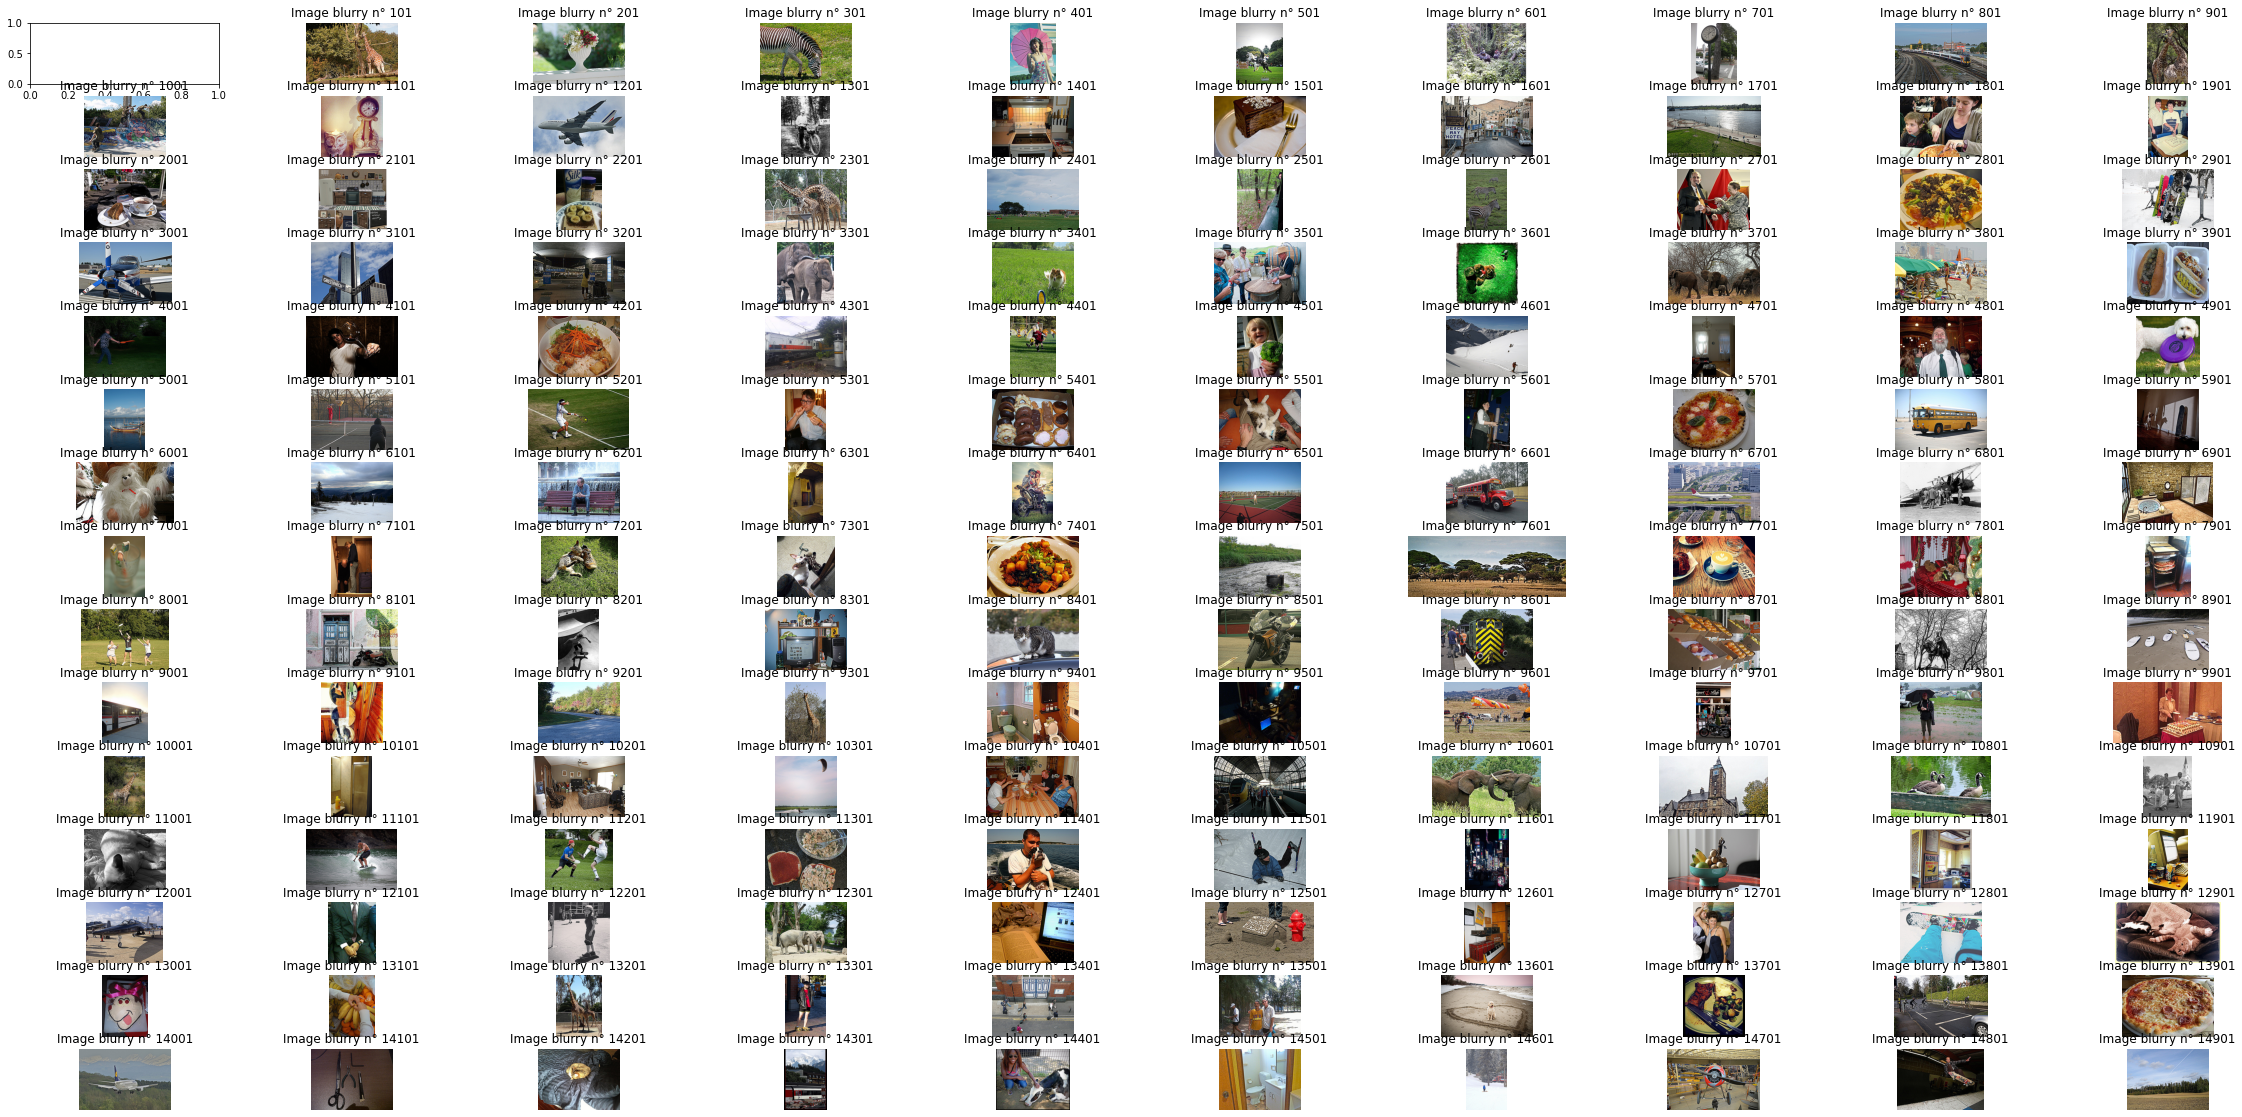

In [9]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import misc
from skimage import io
from scipy import ndimage
import cv2
import os

# Convert RGB image to grey image
def get_img(image_number):
    return io.imread(IMAGES_PATH + IMAGE_TYPE + image_number + IMAGE_EXT) 

def remove_blur(image):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

A0, step = 1, 100
# Path to the 'to modify' images
IMAGES_PATH = "./Dataset/"
IMAGE_TYPE = "Blurry/blurry_"
IMAGE_EXT = ".jpg"

def getFileNumberFromFolder(folder):
    return len(os.listdir(folder))

file_number = getFileNumberFromFolder(IMAGES_PATH + "Blurry/")
fig, axs = plt.subplots(file_number//10, 10, figsize=(40,20))
for i in range(1, file_number):

    # Open single picture
    # .zfill(3) Complete the number with 0 to have a 3caracters number
    img = get_img(str(i).zfill(3))

    # Remove blur from grey image
    sharpenned_img = remove_blur(img)

    # Image diplay
    ax = axs[i//10, i%10]
    ax.axis('off')
    ax.set_title("Image blurry n° "+ str(A0+i*step))
    ax.imshow(sharpenned_img)
    imageio.imwrite(IMAGES_PATH + "processed/deblurred_" + str(i) + '.jpg', sharpenned_img)

# Display the choosen images
plt.show()

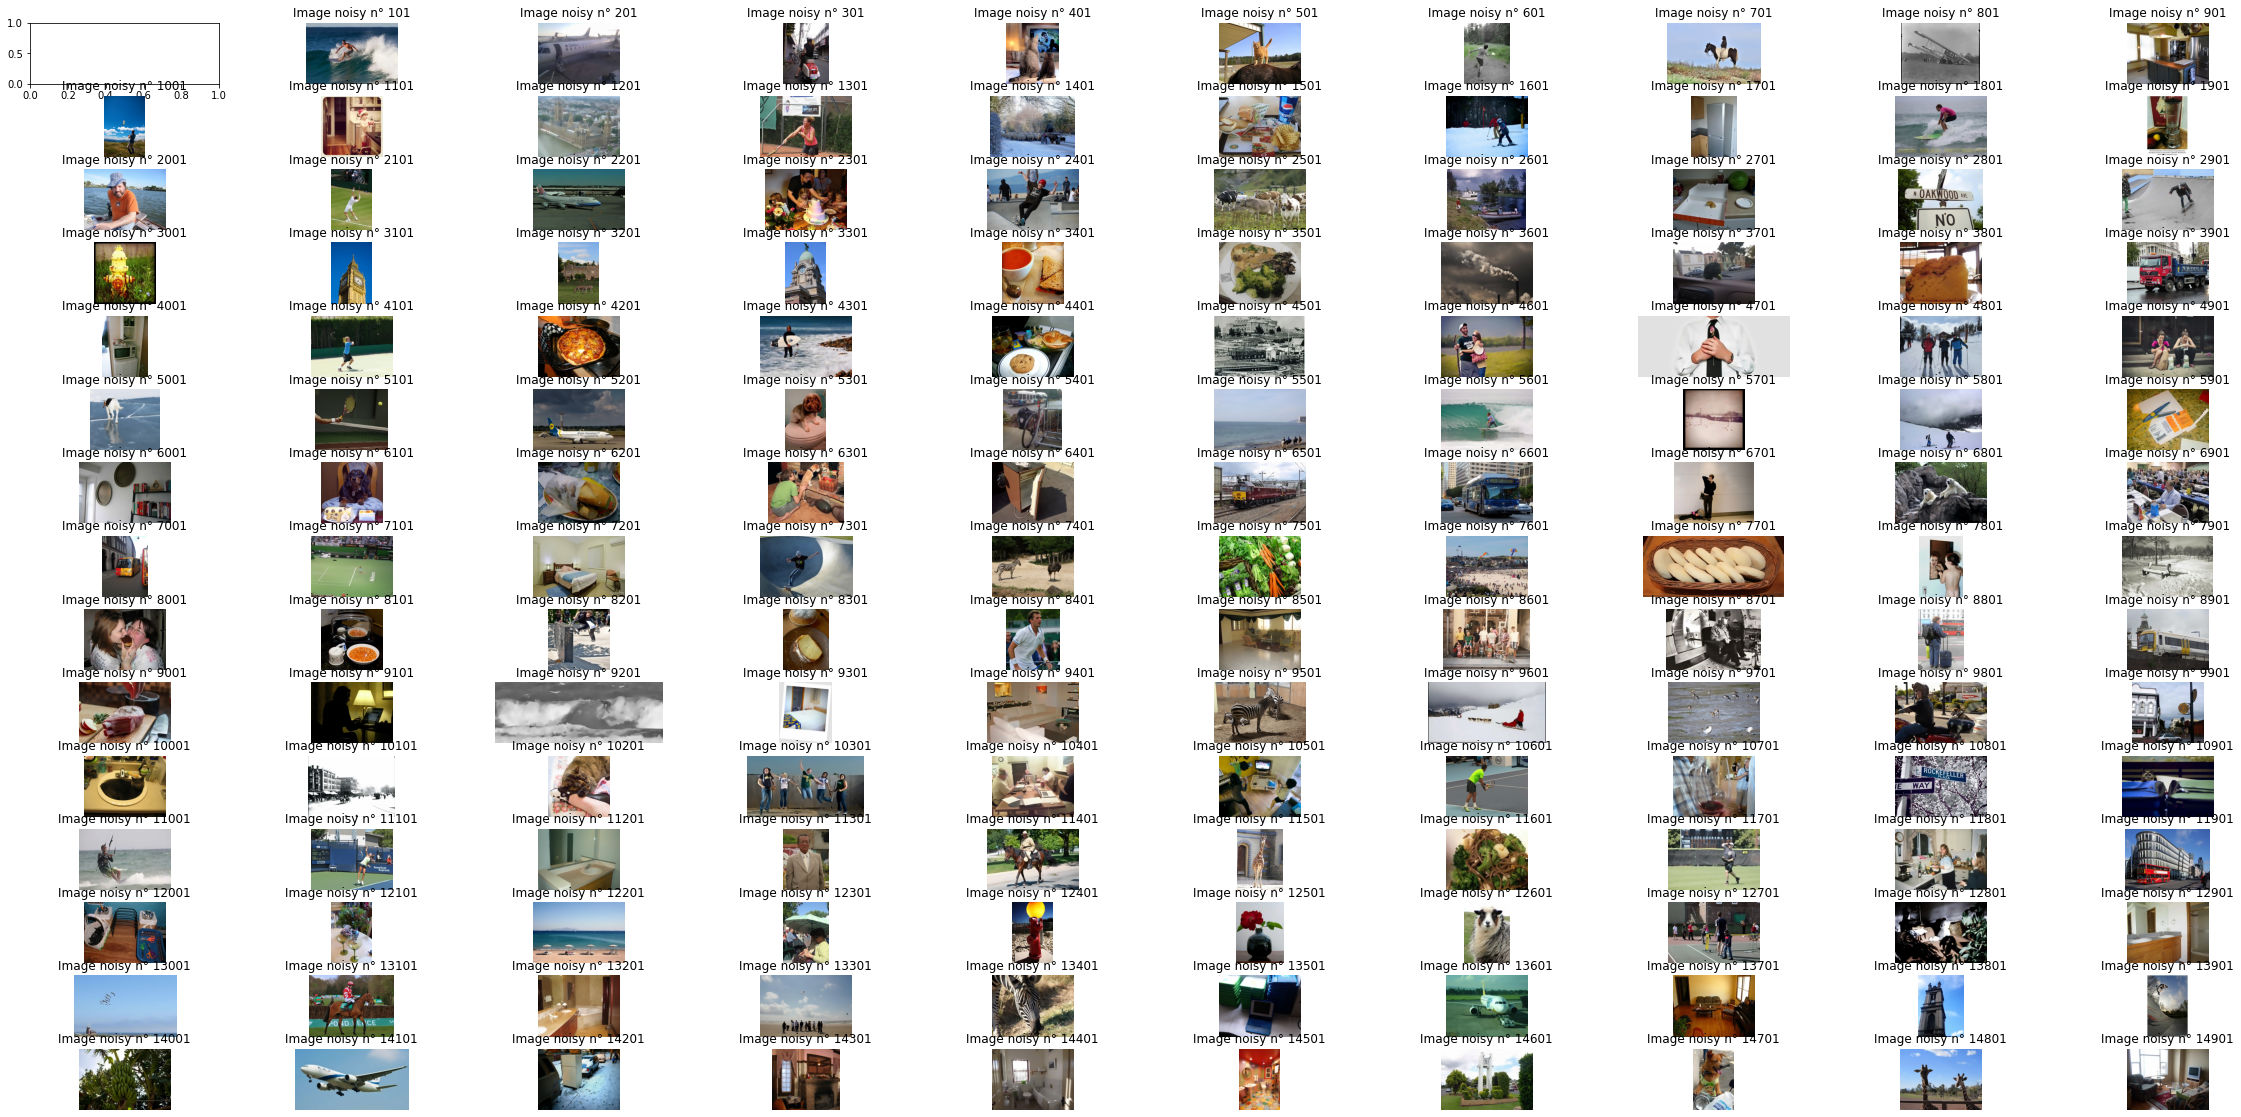

In [8]:
# Convert RGB image to grey image
def get_img(image_number):
    return io.imread(IMAGES_PATH + IMAGE_TYPE + image_number + IMAGE_EXT) 

def remove_noise(image):
    return  cv2.fastNlMeansDenoisingColored(image,None,10,10,7,15)

A0, step = 1, 100
# Path to the 'to modify' images
IMAGES_PATH = "./Dataset/"
IMAGE_TYPE = "Noisy/noisy_"
IMAGE_EXT = ".jpg"

def getFileNumberFromFolder(folder):
    return len(os.listdir(folder))

file_number = getFileNumberFromFolder(IMAGES_PATH + "Noisy/")
fig, axs = plt.subplots(file_number//10, 10, figsize=(40,20))
for i in range(1, file_number):

    # Open single picture
    # .zfill(3) Complete the number with 0 to have a 3caracters number
    img = get_img(str(i).zfill(3))

    # Remove blur from grey image
    sharpenned_img = remove_noise(img)

    # Image diplay
    ax = axs[i//10, i%10]
    ax.axis('off')
    ax.set_title("Image noisy n° "+ str(A0+i*step))
    ax.imshow(sharpenned_img)
    imageio.imwrite(IMAGES_PATH + "processed/denoised_" + str(i) + '.jpg', sharpenned_img)

# Display the choosen images
plt.show()